# FRAUD DETECTION IN FINANCIAL TRANSACTIONS

# Data Collection:

In [50]:

import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/creditcard/creditcard.csv')


# Data Preprocessing:

In [51]:
# Handle missing values
data = data.dropna()

In [52]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [53]:
# Checking for missing values
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Feature Engineering:

In [54]:
# create a feature that calculates the sum of all the 'V' columns
data['V_sum'] = data[[col for col in data.columns if col.startswith('V')]].sum(axis=1)

# Exploratory Data Analysis (EDA):

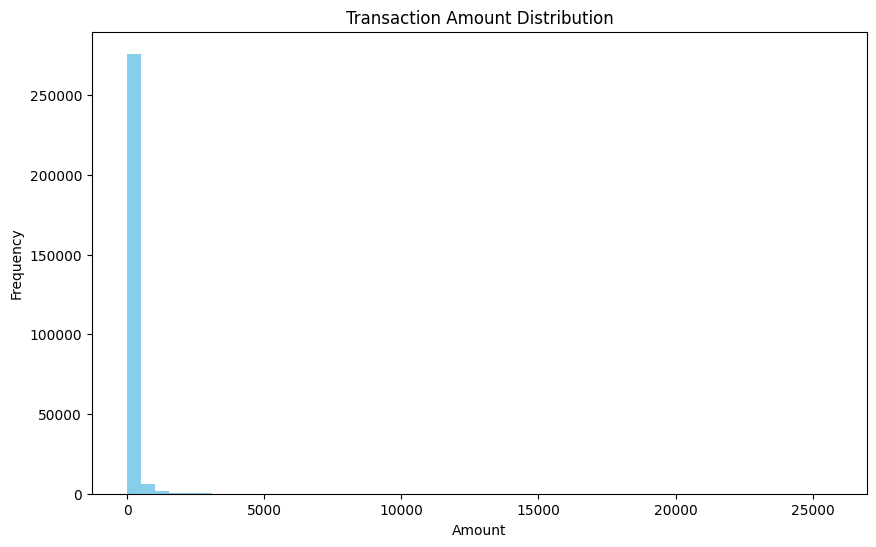

In [55]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Visualize the distribution of the 'Amount' feature
plt.figure(figsize=(10,6))
plt.hist(data['Amount'], bins=50, color='skyblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


# Model Selection:


In [56]:
# Import necessary libraries for model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [57]:
# Choose the models to work with
model1 = RandomForestClassifier()
model2 = SVC()
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(data.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Model Training:

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.2, random_state=42)

In [60]:
from tensorflow.keras.optimizers import Adam

# Define a new model with optimized parameters
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with optimized hyperparameters
opt = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the optimized parameters
history = model.fit(X_train, y_train, epochs=20, batch_size=64)  # Adjust the batch size and number of epochs as needed


Epoch 1/20
3561/3561 [==============================] - 8s 2ms/step - loss: 12.4754 - accuracy: 0.9954
Epoch 2/20
3561/3561 [==============================] - 8s 2ms/step - loss: 4.6747 - accuracy: 0.9964
Epoch 3/20
3561/3561 [==============================] - 8s 2ms/step - loss: 2.2549 - accuracy: 0.9966
Epoch 4/20
3561/3561 [==============================] - 8s 2ms/step - loss: 2.4132 - accuracy: 0.9965
Epoch 5/20
3561/3561 [==============================] - 7s 2ms/step - loss: 1.6352 - accuracy: 0.9966
Epoch 6/20
3561/3561 [==============================] - 7s 2ms/step - loss: 0.5745 - accuracy: 0.9973
Epoch 7/20
3561/3561 [==============================] - 7s 2ms/step - loss: 0.1504 - accuracy: 0.9978
Epoch 8/20
3561/3561 [==============================] - 7s 2ms/step - loss: 0.2453 - accuracy: 0.9976
Epoch 9/20
3561/3561 [==============================] - 7s 2ms/step - loss: 0.0765 - accuracy: 0.9983
Epoch 10/20
3561/3561 [==============================] - 7s 2ms/step - loss: 0.01

# Model Evaluation:

In [61]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [62]:

# obtained y_pred from the model
y_pred = model.predict(X_test)

# Convert y_pred to binary values
y_pred_binary = (y_pred > 0.5).astype(int)



1781/1781 [==============================] - 2s 1ms/step


In [63]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9983673326077034
Precision: 0.8571428571428571
Recall: 0.061224489795918366
F1 Score: 0.11428571428571428


# CLASSIFICATION REPORT:





Accuracy: 0.9983673326077034

Precision: 0.8571428571428571

Recall: 0.061224489795918366

F1 Score: 0.11428571428571428